# Load libs

In [264]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import pandas as pd 
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from textwrap import wrap
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [265]:
data=pd.read_csv('D:/sheharyar/datascience/worldbankindicator.csv')

In [266]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,43864.000000,44228.000000,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.849393,0.826413,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,102112.000000,102880.000000,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.810231,0.749301,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
20212,Zimbabwe,ZWE,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
20213,Zimbabwe,ZWE,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,4.872690,5.001939,5.131188,5.260437,5.337986,...,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,10.339925,NaN
20214,Zimbabwe,ZWE,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,28.396019,28.615743,28.835466,29.055189,29.223213,...,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,41.876696,NaN


# Setup indicators For Slicing Data

In [270]:
#Select the indicator of 
# GDP per capita = NY.GDP.PCAP.CD
# CO2 production per head = EN.ATM.CO2E.KT
# CO2 per $ of GDP = EN.ATM.CO2E.PC
#Total fuel consumtion = EN.CO2.MANF.ZS
indicators = ["EN.ATM.CO2E.PP.GD", "EN.ATM.CO2E.KT", "EN.ATM.CO2E.PC", "EN.ATM.CO2E.GF.ZS"]
co2_stage = data[data["Indicator Code"].isin(indicators)]

In [271]:
co2_stage

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
40,Aruba,ABW,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Aruba,ABW,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Africa Eastern and Southern,AFE,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.306590,0.298683,0.290138,0.273490,0.261359,0.255396,0.243792,0.239219,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20110,Zambia,ZMB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,NaN,NaN,NaN,NaN,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
20180,Zimbabwe,ZWE,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.385422,0.359198,0.340333,0.335797,0.279868,0.300613,0.334753,0.333521,NaN,NaN
20181,Zimbabwe,ZWE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.905368,0.905911,0.871840,0.878139,0.762487,0.700965,0.822472,0.765894,NaN,NaN
20184,Zimbabwe,ZWE,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,12010.000230,12279.999730,12079.999920,12430.000310,11020.000460,10340.000150,12380.000110,11760.000230,NaN,NaN


Text(0.5, 1.0, 'Target feature - class')

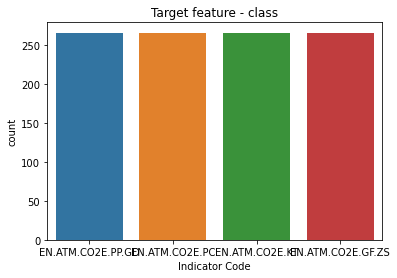

In [272]:
import seaborn as sns # statistical data visualization
sns.countplot(x=co2_stage['Indicator Code'])
plt.title('Target feature - class')

In [273]:
co2_stage.isnull().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
1960               908
                  ... 
2017               356
2018               356
2019               356
2020              1064
2021              1064
Length: 66, dtype: int64

In [274]:
co2_stage['1960'].fillna(co2_stage['1960'].median(), inplace = True)
co2_stage['1961'].fillna(co2_stage['1961'].median(), inplace = True)
co2_stage['1962'].fillna(co2_stage['1962'].median(), inplace = True)
co2_stage['1963'].fillna(co2_stage['1963'].median(), inplace = True)
co2_stage['1964'].fillna(co2_stage['1964'].median(), inplace = True)
co2_stage['1965'].fillna(co2_stage['1965'].median(), inplace = True)
co2_stage['1966'].fillna(co2_stage['1966'].median(), inplace = True)
co2_stage['1967'].fillna(co2_stage['1967'].median(), inplace = True)
co2_stage['1968'].fillna(co2_stage['1968'].median(), inplace = True)
co2_stage['1969'].fillna(co2_stage['1969'].median(), inplace = True)
co2_stage['1970'].fillna(co2_stage['1970'].median(), inplace = True)
co2_stage['1971'].fillna(co2_stage['1971'].median(), inplace = True)
co2_stage['1972'].fillna(co2_stage['1972'].median(), inplace = True)
co2_stage['1973'].fillna(co2_stage['1973'].median(), inplace = True)
co2_stage['1974'].fillna(co2_stage['1974'].median(), inplace = True)
co2_stage['1975'].fillna(co2_stage['1975'].median(), inplace = True)
co2_stage['1976'].fillna(co2_stage['1976'].median(), inplace = True)
co2_stage['1977'].fillna(co2_stage['1977'].median(), inplace = True)
co2_stage['1978'].fillna(co2_stage['1978'].median(), inplace = True)
co2_stage['1979'].fillna(co2_stage['1979'].median(), inplace = True)
co2_stage['1980'].fillna(co2_stage['1980'].median(), inplace = True)
co2_stage['1981'].fillna(co2_stage['1981'].median(), inplace = True)
co2_stage['1982'].fillna(co2_stage['1982'].median(), inplace = True)
co2_stage['1983'].fillna(co2_stage['1983'].median(), inplace = True)
co2_stage['1984'].fillna(co2_stage['1984'].median(), inplace = True)
co2_stage['1985'].fillna(co2_stage['1985'].median(), inplace = True)
co2_stage['1986'].fillna(co2_stage['1986'].median(), inplace = True)
co2_stage['1987'].fillna(co2_stage['1987'].median(), inplace = True)
co2_stage['1988'].fillna(co2_stage['1988'].median(), inplace = True)
co2_stage['1989'].fillna(co2_stage['1989'].median(), inplace = True)
co2_stage['1990'].fillna(co2_stage['1990'].median(), inplace = True)
co2_stage['1991'].fillna(co2_stage['1991'].median(), inplace = True)
co2_stage['1992'].fillna(co2_stage['1992'].median(), inplace = True)
co2_stage['1993'].fillna(co2_stage['1993'].median(), inplace = True)
co2_stage['1994'].fillna(co2_stage['1994'].median(), inplace = True)
co2_stage['1995'].fillna(co2_stage['1995'].median(), inplace = True)
co2_stage['1996'].fillna(co2_stage['1996'].median(), inplace = True)
co2_stage['1997'].fillna(co2_stage['1997'].median(), inplace = True)
co2_stage['1998'].fillna(co2_stage['1998'].median(), inplace = True)
co2_stage['1999'].fillna(co2_stage['1999'].median(), inplace = True)
co2_stage['2000'].fillna(co2_stage['2000'].median(), inplace = True)
co2_stage['2001'].fillna(co2_stage['2001'].median(), inplace = True)
co2_stage['2002'].fillna(co2_stage['2002'].median(), inplace = True)
co2_stage['2003'].fillna(co2_stage['2003'].median(), inplace = True)
co2_stage['2004'].fillna(co2_stage['2004'].median(), inplace = True)
co2_stage['2005'].fillna(co2_stage['2005'].median(), inplace = True)
co2_stage['2006'].fillna(co2_stage['2006'].median(), inplace = True)
co2_stage['2007'].fillna(co2_stage['2007'].median(), inplace = True)
co2_stage['2008'].fillna(co2_stage['2008'].median(), inplace = True)
co2_stage['2009'].fillna(co2_stage['2009'].median(), inplace = True)
co2_stage['2010'].fillna(co2_stage['2010'].median(), inplace = True)
co2_stage['2011'].fillna(co2_stage['2011'].median(), inplace = True)
co2_stage['2012'].fillna(co2_stage['2012'].median(), inplace = True)
co2_stage['2013'].fillna(co2_stage['2013'].median(), inplace = True)
co2_stage['2014'].fillna(co2_stage['2014'].median(), inplace = True)
co2_stage['2015'].fillna(co2_stage['2015'].median(), inplace = True)
co2_stage['2016'].fillna(co2_stage['2016'].median(), inplace = True)
co2_stage['2017'].fillna(co2_stage['2017'].median(), inplace = True)
co2_stage['2018'].fillna(co2_stage['2018'].median(), inplace = True)
co2_stage['2019'].fillna(co2_stage['2019'].median(), inplace = True)
co2_stage['2020'].fillna(co2_stage['2020'].median(), inplace = True)
co2_stage['2021'].fillna(co2_stage['2021'].median(), inplace = True)


C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [275]:
df1 = co2_stage.dropna(axis=1)
print(df1)

                      Country Name Country Code  \
40                           Aruba          ABW   
41                           Aruba          ABW   
44                           Aruba          ABW   
46                           Aruba          ABW   
116    Africa Eastern and Southern          AFE   
...                            ...          ...   
20110                       Zambia          ZMB   
20180                     Zimbabwe          ZWE   
20181                     Zimbabwe          ZWE   
20184                     Zimbabwe          ZWE   
20186                     Zimbabwe          ZWE   

                                          Indicator Name     Indicator Code  \
40                   CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   
41                CO2 emissions (metric tons per capita)     EN.ATM.CO2E.PC   
44                                    CO2 emissions (kt)     EN.ATM.CO2E.KT   
46     CO2 emissions from gaseous fuel consumption (%...  EN.ATM.CO2E.G

In [276]:
df1.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2015              0
2016              0
2017              0
2018              0
2019              0
Length: 64, dtype: int64

In [277]:
df1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
40,Aruba,ABW,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,0.0,0.0,0.0,0.0,0.0,0.0,...,4.170320,4.333829,4.371890,4.060665,4.074235,4.064225,4.225179,3.143990,3.176432,3.310069
41,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,4.170320,4.333829,4.371890,4.060665,4.074235,4.064225,4.225179,3.143990,3.176432,3.310069
44,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,0.0,0.0,0.0,0.0,0.0,0.0,...,4.170320,4.333829,4.371890,4.060665,4.074235,4.064225,4.225179,3.143990,3.176432,3.310069
46,Aruba,ABW,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,4.170320,4.333829,4.371890,4.060665,4.074235,4.064225,4.225179,3.143990,3.176432,3.310069
116,Africa Eastern and Southern,AFE,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.317443,0.294643,0.306590,0.298683,0.290138,0.273490,0.261359,0.255396,0.243792,0.239219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20110,Zambia,ZMB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.143990,3.176432,3.310069
20180,Zimbabwe,ZWE,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.414446,0.421008,0.385422,0.359198,0.340333,0.335797,0.279868,0.300613,0.334753,0.333521
20181,Zimbabwe,ZWE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.747677,0.875955,0.905368,0.905911,0.871840,0.878139,0.762487,0.700965,0.822472,0.765894
20184,Zimbabwe,ZWE,CO2 emissions (kt),EN.ATM.CO2E.KT,0.0,0.0,0.0,0.0,0.0,0.0,...,9600.000381,11409.999850,12010.000230,12279.999730,12079.999920,12430.000310,11020.000460,10340.000150,12380.000110,11760.000230


In [278]:
df2=df1.drop(['Country Name','Indicator Name'], axis=1)

In [279]:
df2

,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
40,ABW,EN.ATM.CO2E.PP.GD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.170320,4.333829,4.371890,4.060665,4.074235,4.064225,4.225179,3.143990,3.176432,3.310069
41,ABW,EN.ATM.CO2E.PC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.170320,4.333829,4.371890,4.060665,4.074235,4.064225,4.225179,3.143990,3.176432,3.310069
44,ABW,EN.ATM.CO2E.KT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.170320,4.333829,4.371890,4.060665,4.074235,4.064225,4.225179,3.143990,3.176432,3.310069
46,ABW,EN.ATM.CO2E.GF.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.170320,4.333829,4.371890,4.060665,4.074235,4.064225,4.225179,3.143990,3.176432,3.310069
116,AFE,EN.ATM.CO2E.PP.GD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.317443,0.294643,0.306590,0.298683,0.290138,0.273490,0.261359,0.255396,0.243792,0.239219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20110,ZMB,EN.ATM.CO2E.GF.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.143990,3.176432,3.310069
20180,ZWE,EN.ATM.CO2E.PP.GD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.414446,0.421008,0.385422,0.359198,0.340333,0.335797,0.279868,0.300613,0.334753,0.333521
20181,ZWE,EN.ATM.CO2E.PC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.747677,0.875955,0.905368,0.905911,0.871840,0.878139,0.762487,0.700965,0.822472,0.765894
20184,ZWE,EN.ATM.CO2E.KT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9600.000381,11409.999850,12010.000230,12279.999730,12079.999920,12430.000310,11020.000460,10340.000150,12380.000110,11760.000230


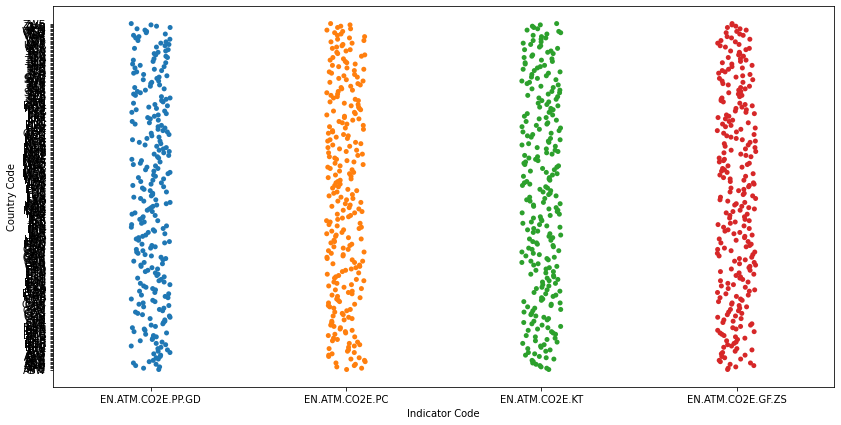

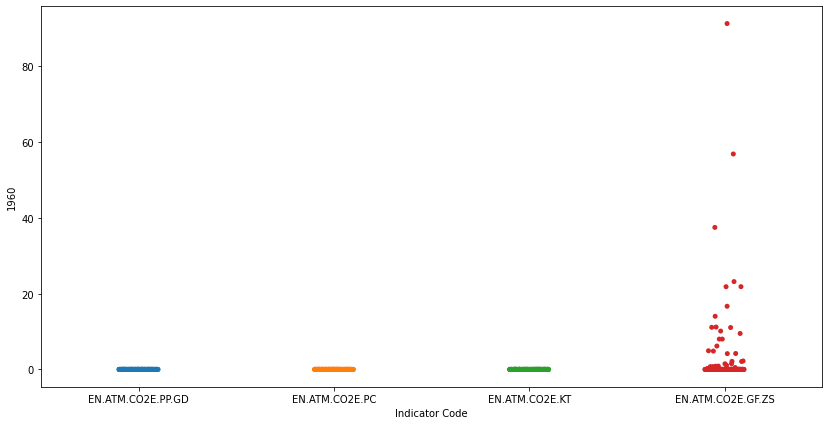

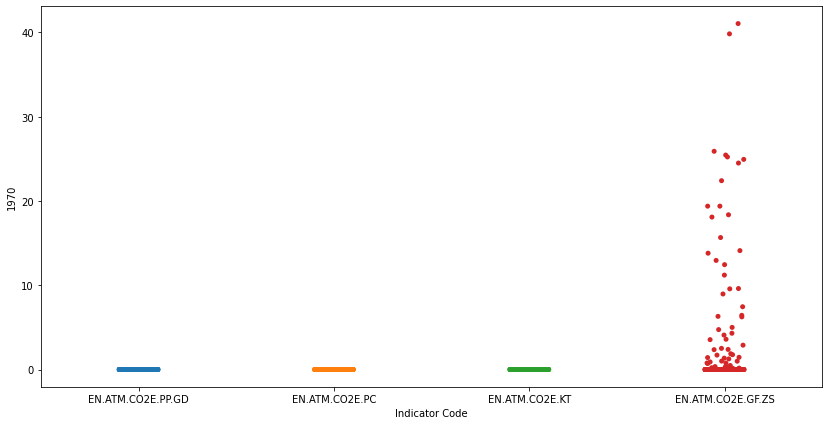

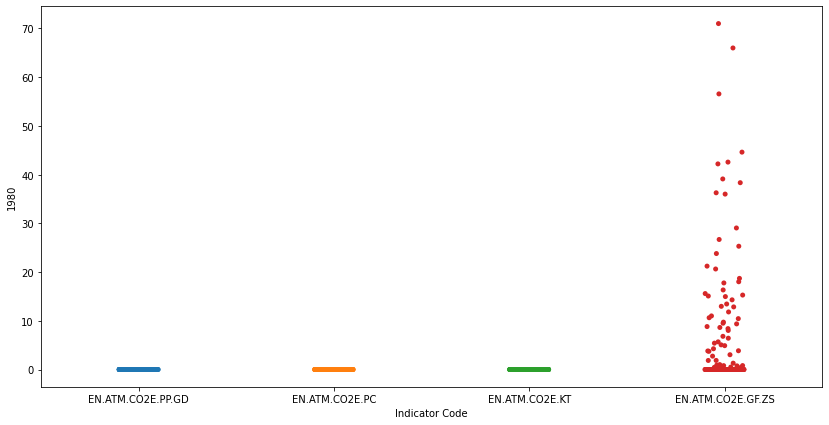

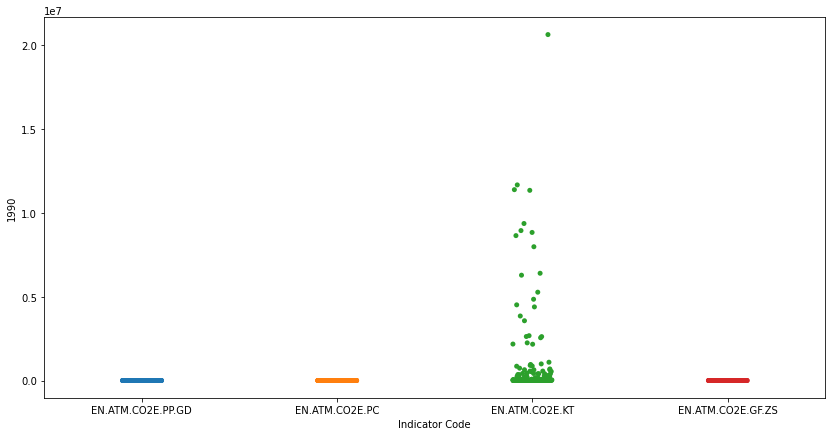

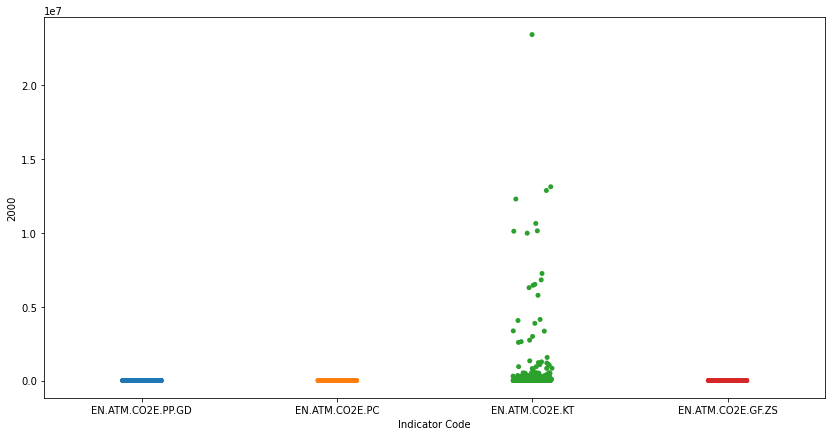

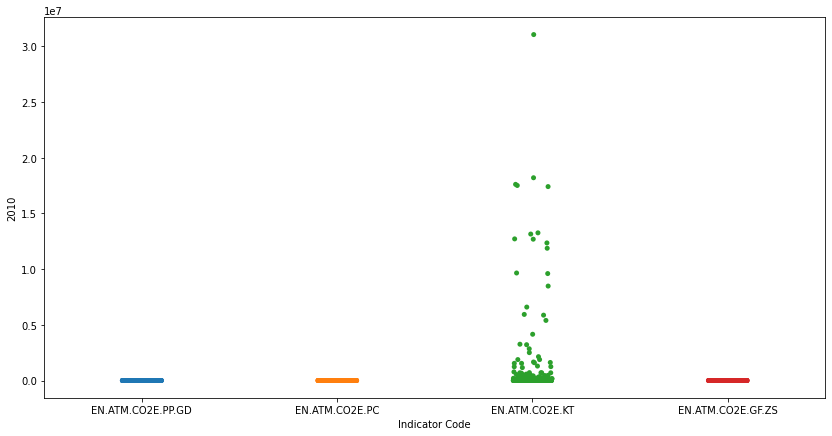

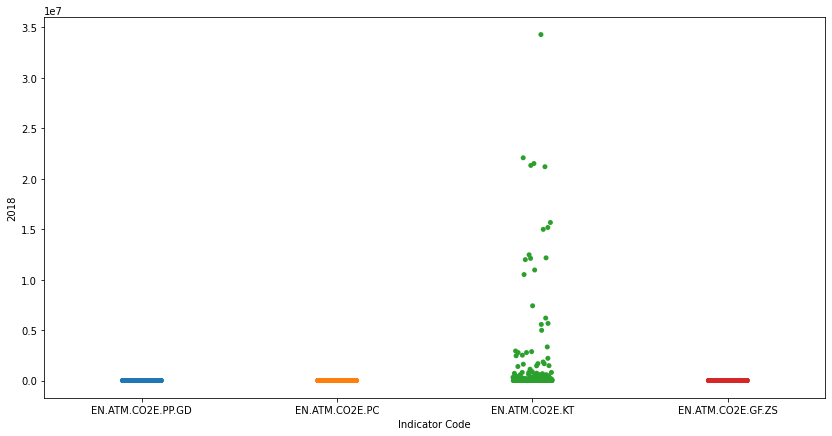

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Country Code', '1960', '1970', '1980', '1990', '2000', '2010', '2018']

for i in features:
    fig, ax = plt.subplots(figsize=(14,7))
    sns.stripplot(x='Indicator Code', y=i, data=df2);

# Using another dataset for clustring and fitting


In [280]:
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [281]:
countries_data=pd.read_csv("D:/sheharyar/datascience/Country-data.csv")
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Describe Dataset

In [282]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [283]:
countries_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Scaling the data and checking feasibility of clusters formation

In [284]:
scaler=StandardScaler()
countries_data_scaled=scaler.fit_transform(countries_data.loc[:,"child_mort":"gdpp"])

# Creating a new dataframe to store the scaled data

countries_data_scaled=pd.DataFrame(countries_data_scaled)
countries_data_scaled.columns=countries_data.loc[:,"child_mort":"gdpp"].columns

# Inspecting the first 5 rows of the newly created dataframe

countries_data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


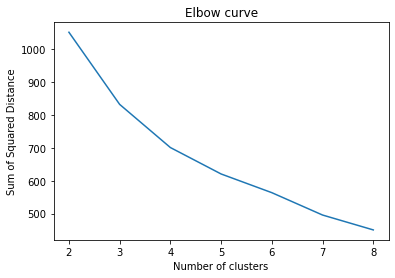

In [285]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_data_scaled)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters

plt.plot(range_n_clusters, ssd)
plt.title("Elbow curve")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Distance")
plt.show()

# Identifying the right number of clusters using silhouette analysis

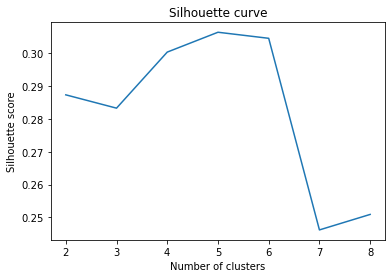

In [308]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg_list = []
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_data_scaled)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countries_data_scaled, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_avg_list)
plt.title("Silhouette curve")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [310]:
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=0)
kmeans.fit(countries_data_scaled)
countries_data['cluster_id'] = kmeans.labels_
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [312]:
# Determining the number of countries per cluster

countries_data.groupby("cluster_id")["country"].count()

cluster_id
0    88
1    46
2    30
3     3
Name: country, dtype: int64

Since the number of clusters in Cluster 3 are not material, we will stick to 3 instead of 4 clusters and re-run K-means Algorithm

In [313]:
# Model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=0)
kmeans.fit(countries_data_scaled)
countries_data['cluster_id'] = kmeans.labels_
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [314]:
# Determining the number of countries per cluster

countries_data.groupby("cluster_id")["country"].count()

cluster_id
0    47
1    84
2    36
Name: country, dtype: int64

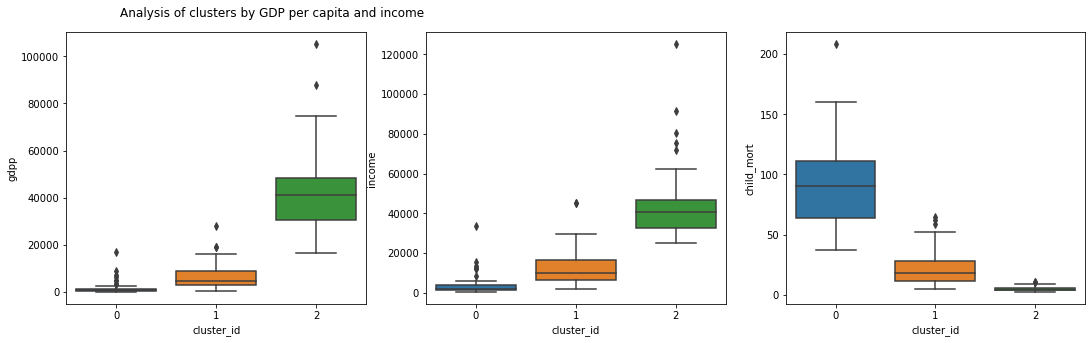

In [316]:
 #Analysing newly formed clusters based on GDP per capita, child mortality and income
plt.figure(figsize=[2,5])
plt.subplot(1,3,1)
sns.boxplot(data=countries_data, x="cluster_id", y="gdpp")
plt.subplot(1,3,3)
sns.boxplot(data=countries_data, x="cluster_id", y="child_mort")
plt.subplot(1,3,2)
sns.boxplot(data=countries_data, x="cluster_id", y="income")
plt.subplots_adjust(right=7.2)
plt.suptitle("Analysis of clusters by GDP per capita and income", horizontalalignment="left", y=0.95)
plt.show()

# Comparison For cluster

Cluster 1 and 2 are at a higher level of GDP per capita and income and low on child mortality. This means Cluster 2 is developing and Cluster 1 is the developed countries.
Cluster 0 is at lower levels of GDP per capita and income but higher on child mortality. This means this cluster contains the less developed countries.

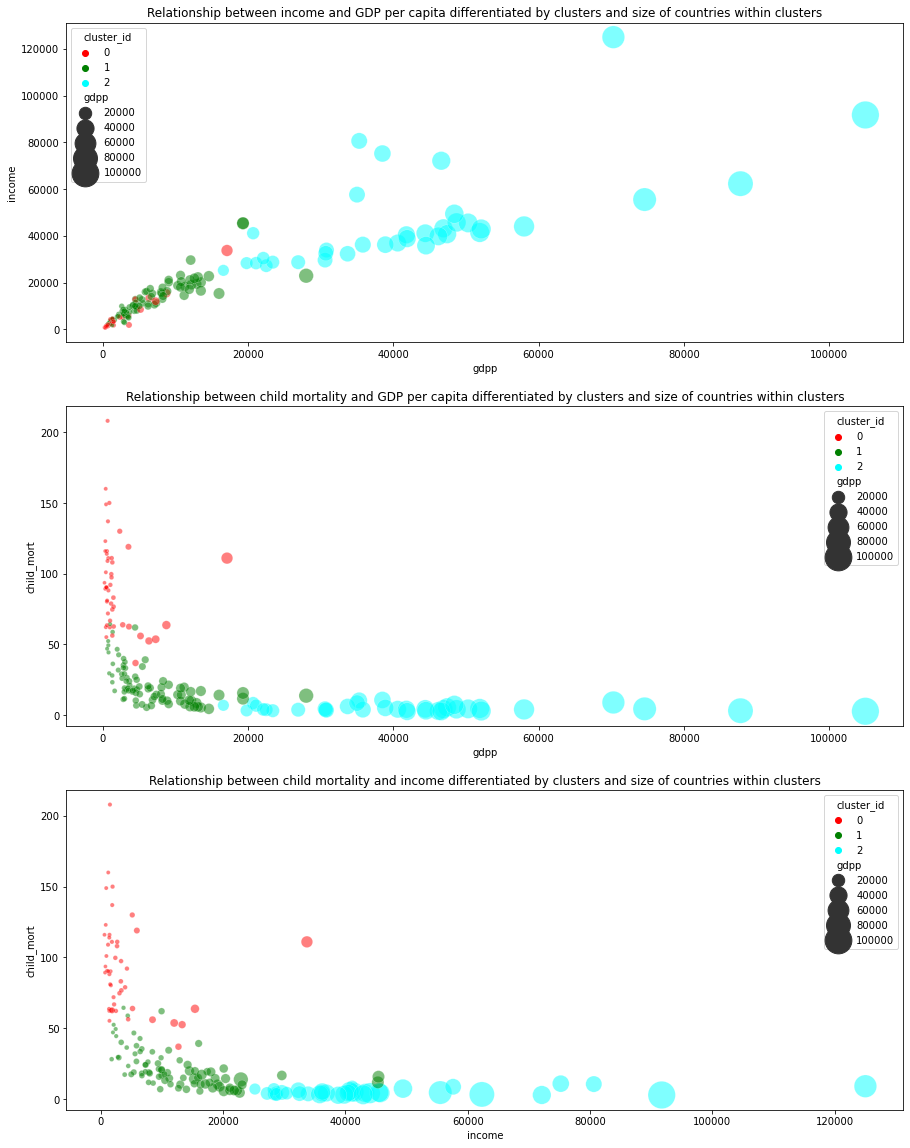

In [317]:
# Visualizing the formation of clusters using the relationship between key variables

plt.figure(figsize=[15,20])

plt.subplot(3,1,1)
sns.scatterplot(x="gdpp", 
                y="income",
                size="gdpp",
                sizes=(15,750),
                alpha=0.5, hue="cluster_id", palette=["red","green","cyan"],
                data=countries_data)
plt.title("Relationship between income and GDP per capita differentiated by clusters and size of countries within clusters")
plt.subplot(3,1,2)
sns.scatterplot(x="gdpp", 
                y="child_mort",
                size="gdpp",
                sizes=(15,750),
                alpha=0.5, hue="cluster_id", palette=["red","green","cyan"],
                data=countries_data)
plt.title("Relationship between child mortality and GDP per capita differentiated by clusters and size of countries within clusters")

plt.subplot(3,1,3)
sns.scatterplot(x="income", 
                y="child_mort",
                size="gdpp",
                sizes=(15,750),
                alpha=0.5, hue="cluster_id", palette=["red","green","cyan"],
                data=countries_data)
plt.title("Relationship between child mortality and income differentiated by clusters and size of countries within clusters")

plt.show()

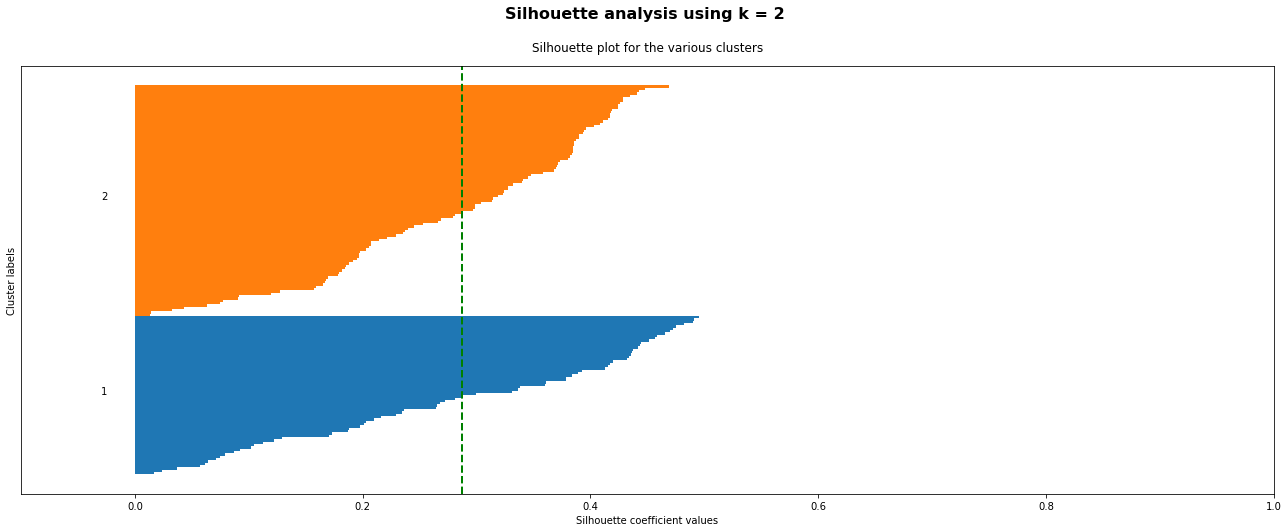

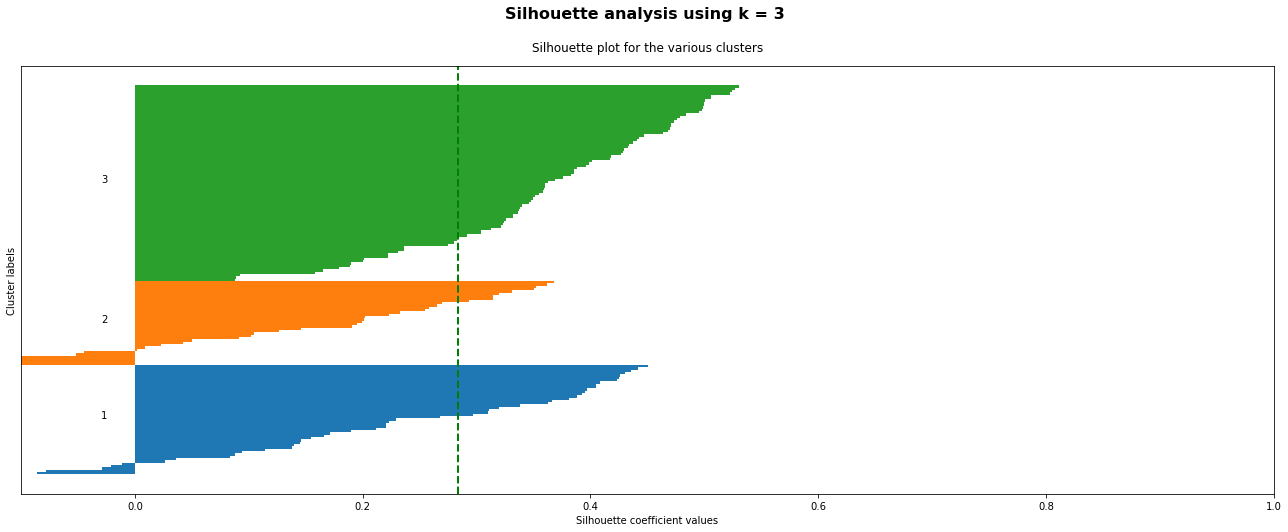

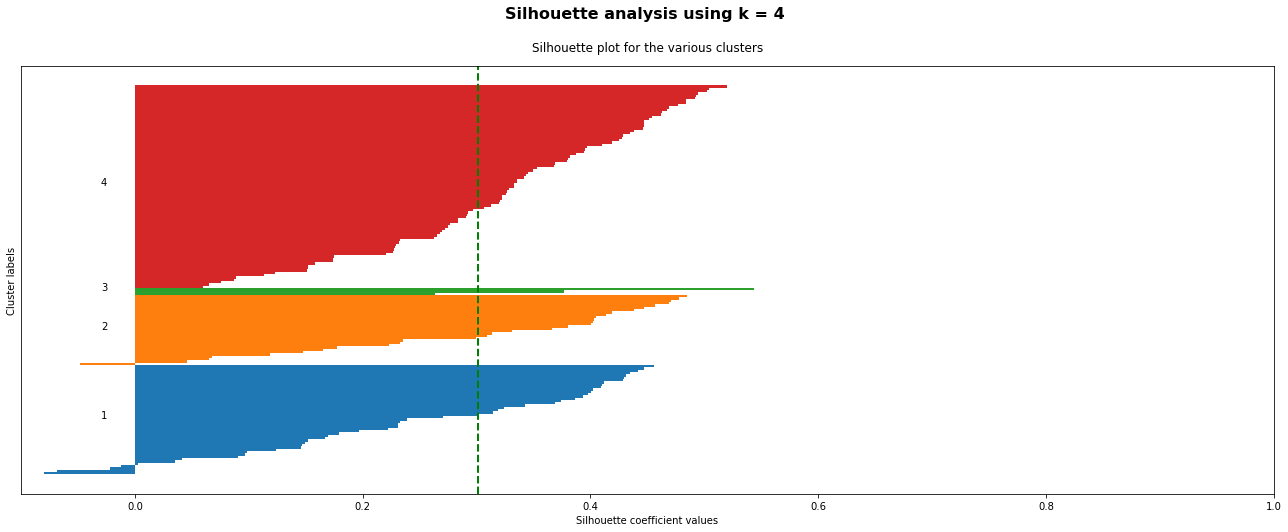

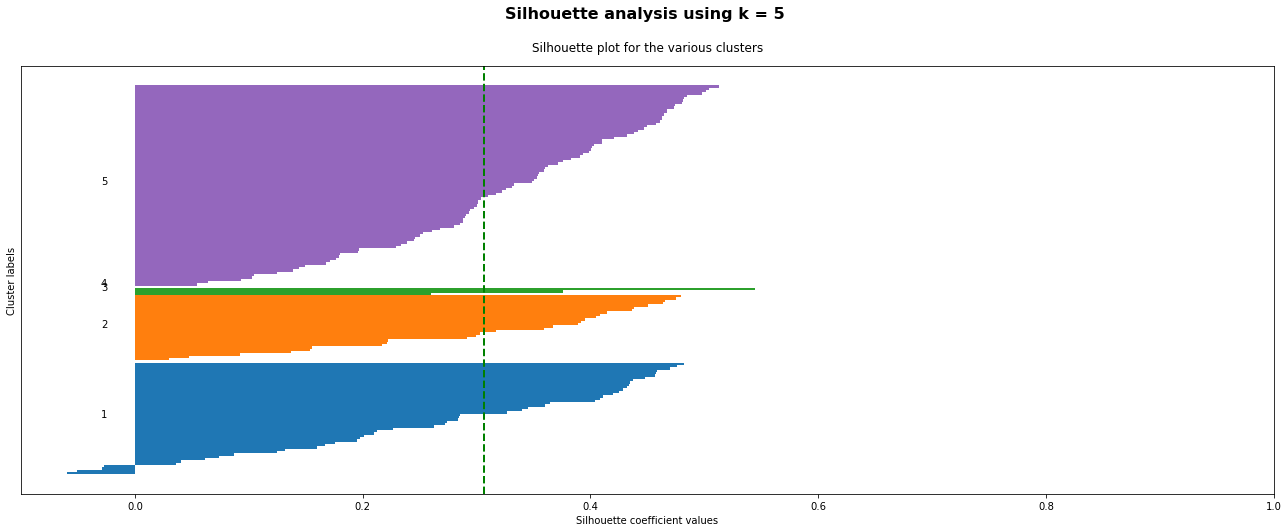

In [319]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3, 4,5]):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(countries_data_scaled)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(countries_data_scaled, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);